<a href="https://colab.research.google.com/github/sid-mercor/mercor-scicode/blob/main/Laser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
# from scipy.integrate import simps

def propagate_gaussian_beam(N: int, Ld: float, w0: float, z: float, L: float) -> np.ndarray:
    '''Propagate a Gaussian beam and calculate its intensity distribution before and after propagation.
    Input
    N : int
        The number of sampling points in each dimension (assumes a square grid).
    Ld : float
        Wavelength of the Gaussian beam.
    w0 : float
        Waist radius of the Gaussian beam at its narrowest point.
    z : float
        Propagation distance of the Gaussian beam.
    L : float
        Side length of the square area over which the beam is sampled.
    Ouput
    Gau:     a 2D array with dimensions (N+1, N+1) representing the absolute value of the beam's amplitude distribution before propagation.
    Gau_Pro: a 2D array with dimensions (N+1, N+1) representing the absolute value of the beam's amplitude distribution after propagation.
    '''
    k = 2 * np.pi / Ld
    dx = L / N
    x = np.linspace(-L/2, L/2, N)   # <-- small fix: you had np/linspace (typo)
    X, Y = np.meshgrid(x, x)

    # Representing the initial field E_0 for the TEM_00 mode
    E_0 = np.exp(-(X**2 + Y**2) / w0**2)

    # FFT domain setup
    fx = np.fft.fftfreq(N, dx)
    FX, FY = np.meshgrid(fx, fx)
    kx = 2 * np.pi * FX
    ky = 2 * np.pi * FY
    kz = np.sqrt(k**2 - kx**2 - ky**2 + 0j)

    # Now applying FFT to the initial field
    E0_FFT = np.fft.fft2(E_0)
    F = np.exp(1j * kz * z)
    Ez_FFT = E0_FFT * F
    Ez = np.fft.ifft2(Ez_FFT)

    # Return absolute values (intensity distribution)
    return np.abs(E_0), np.abs(Ez)

In [ ]:
N = 500  # sample number ,
L = 10*10**-3   # Full side length
Ld = 2.1* 10**-6 #0.6328 * 10**-6
w0 = 1.0 * 10**-3
z = 20
gau1, gau2= propagate_gaussian_beam(N, Ld, w0, z, L)
# domain specific check 1
# Physics Calculate the energy info at beginning and end
# The result is Intensity distrbution
# The total energy value is expressed as total power, the intensity integrated over the cross section
dx = L/N
dy = L/N
dA = dx*dy
P1 = np.sum(gau1) * dA
P2 = np.sum(gau2)* dA
#assert np.allclose((P1, P2), target)
print(P1)
print("Total power:", round(P1, 7))
print(P2)
print("Total power:", round(P2, 7))

3.129038849337377e-06
Total power: 3.1e-06
1.1710285020668679e-05
Total power: 1.17e-05


For free space optical communication application, a Gaussian beam of light having a wavelength of $lambda$ = 2.1 $\mu\text{m}$ travels through free space in $z$ direction. The beam has a waist radius at its narrowest point as $\omega_0$= 1.0 mm. After propagating through free space in $z$ direction it takes the form $E(r,z) = E_0 (\omega_0/\omega_z) exp(-(r^2)/( \omega_0^2)$ where $r$ is the radial distance from $z$ direction given as $r^2 = x^2 + y^2$, $E_0$ is the intensity distribution at $z$ = 0, and $\omega_z$ is the beam radius at $z$ distance. The beam is sampled over a square region in the $x$–$y$ plane with a number of sampling points in each dimension to be $N = 500$, and a side length of the sampling window as $L = 10 \,\text{mm}$. What would be the total power $P(z)$ of the Gaussian beam intensity distribution after it propagates a distance of $z = 20 \,\text{m}$? The answer should be precisely up to 2 decimal places.

In [ ]:
import numpy as np
from math import cos, pi

x_vals = [(1.05)**n * cos(2*pi/8 * n) for n in range(100)]
total = np.sum(x_vals)

print("Total sum:", total)

Total sum: 55.25491000110459


In [ ]:
import numpy as np
from math import cos, pi
x_vals = [(1.05)**n * cos(2*pi/8 * n) for n in range(1, 101)]
energy = np.sum([val**2 for val in x_vals])
print(energy)
print("Total energy:", round(energy, 6))

97738.35605696036
Total energy: 97738.356057


In [ ]:
import math

def main():
    energy = 0.0
    odd_sum = 0.0
    even_sum = 0.0

    for n in range(1, 101):
        val = (1.05 ** n) * math.cos((2 * math.pi / 8) * n)
        energy += val ** 2

        if n % 2 == 0:
            even_sum += val
        else:
            odd_sum += val

    print("Total energy:", round(energy, 6))
    print("Sum of odd-indexed samples:", round(odd_sum, 6))
    print("Sum of even-indexed samples:", round(even_sum, 6))

if __name__ == "__main__":
    main()

Total energy: 97738.356057
Sum of odd-indexed samples: -4.551402
Sum of even-indexed samples: -72.694946


A time varying discrete sinusoidal signal with an exponentially varying amplitude f(n) = $1.05^n cos((2 \pi/8)n)$ for n = {1, 2, 3,….,100} is to be sent over a communication system to approximate its channel fading effects. The length of the channel is 100 m. Before its launch into the system we need to accurately measure the total energy of this signal over a given range.  What would be the total energy component for the given signal in this system. Also provide the sum of odd and even symmetric components of the signal. Provide an accurate value of up to 6  decimal positions.

In [ ]:
import sympy as sp
R1, R2, R3, R4, R5, R6 = sp.symbols('R1 R2 R3 R4 R5 R6', positive=True)
V1, V2, V3 = sp.symbols('V1 V2 V3')
I1, I2, I3 = sp.symbols('I1 I2 I3')
#V2_eq = sp.Eq(V2, -R4*I1 + (R2 + R4 + R6)*I2 - R6*I3)
V2_eq = (V2, -R4*I1 + (R2 + R4 + R6)*I2 - R6*I3)
print("V2 =", V2_eq)


V2 = (V2, -I1*R4 + I2*(R2 + R4 + R6) - I3*R6)


In [ ]:
# importing library sympy
from sympy import symbols, Eq, solve
r1 = 1
r2 = 2
r3 = 3
r4 = 4
r5 = 5
r6 = 6
r7 = 7
r8 = 8
v1 = 1
v2 = 2
v3 = 3
# defining symbols used in equations
# or unknown variables
i1, i2, i3 = symbols('i1,i2,i3')

# defining equations
eq1 = Eq(((r1+r4+r5)*i1-r4*i2-r5*i3), v1)
print("Equation 1:")
print(eq1)

eq2 = Eq((-r4*i1+(r2+r4+r6)*i2-r6*i3), v2)
print("Equation 2")
print(eq2)

eq3 = Eq((-r5*i1-r6*i2+(r3+r5+r6)*i3), v3)
print("Equation 3")

# solving the equation and printing the
# value of unknown variables
print("Values of 3 unknown variable are as follows:")
print(solve((eq1, eq2, eq3), (i1, i2, i3)))

Equation 1:
Eq(10*i1 - 4*i2 - 5*i3, 1)
Equation 2
Eq(-4*i1 + 12*i2 - 6*i3, 2)
Equation 3
Values of 3 unknown variable are as follows:
{i1: 1, i2: 1, i3: 1}


A circuit with independent voltage sources and multiple resistors forming a rectangular mesh can be used in electrical networks to find the distribution of currents in different branches of a DC power system. The network is designed in such a way that it consists of three circuit loops $L_1$, $L_2$ and $L_3$, each consisting of an independent voltage source $V_1$ = 1 V, $V_2$ = 2 V and $V_3$ =3 V respectively. Six different resisters $R_1$ through $R_6$ are connected within the electronic circuit such that the value of $R_1$ = 1 $\Omega$, $R_2$ = 2 $\Omega$, and so on up to $R_6$ = 6 $\Omega$. The network loops are arranged such that in $L_1$, $V_1$ is connected in series to resister $R_1$ while in parallel to $R_4$ and $R_5$. In $L_2$, $V_2$ is in series with $R_2$ and in parallel to $R_4$ and $R_6$. In case of $L_3$, $V_3$ is in series with $R_3$ while in parallel to $R_5$ and $R_6$. Within the electronic network R4 is shared with $L_2$ and $R_5$ is shared with $L_3$. The voltage source $V_1$ generates the current $I_1$ that moves away from the source. $V_2$ generates $I_3$ that also moves away from the source. In case of $V_3$, current $I_2$ enters the source from its negative terminal. We are interested in solving the system of multiple loops for obtaining $I_1$, $I_2$ and $I_3$ for given values of resistances and voltages. What would be the values of $I_1$, $I_2$ and $I_3$ in this electronic network?

In [ ]:
import numpy as np
def main ():
    N = 500
    L = 10*10**-3
    Ld = 2.1* 10**-6
    w0 = 1.0 * 10**-3
    z = 20
    k = 2 * np.pi / Ld
    dx = L / N
    x = np.linspace(-L/2, L/2, N)
    X, Y = np.meshgrid(x, x)
    E_0 = np.exp(-(X**2 + Y**2) / w0**2)
    fx = np.fft.fftfreq(N, dx)
    FX, FY = np.meshgrid(fx, fx)
    kx = 2 * np.pi * FX
    ky = 2 * np.pi * FY
    kz = np.sqrt(k**2 - kx**2 - ky**2 + 0j)
    E0_FFT = np.fft.fft2(E_0)
    F = np.exp(1j * kz * z)
    Ez_FFT = E0_FFT * F
    Ez = np.fft.ifft2(Ez_FFT)
    dx = L/N
    dy = L/N
    dA = dx*dy
    P1 = np.abs(Ez)
    P_z = np.sum(P1) * dA
    print(P_z)
if __name__ == "__main__":
    main()


1.1710285020668679e-05


In [ ]:
import numpy as np
import math
a = 4*10**-6
n1 = 1.46
Ld = 1.55e-6  # and ld = 1.55 e-6
delta = 0.003
# normalized frequency
b = ((2*np.pi*a)/Ld)
c = math.sqrt(2*delta)
V = b*n1*c
w = a*(0.65 + (1.619/V**(3/2))+ (2.879/V**6))
w_p = w - a*(0.016 + (1.567/V**7))
print(w)
print(w_p)
print(V)

5.510853520852447e-06
5.356950871468559e-06
1.833735287820843


In [ ]:
import numpy as np
def main():
    N = 1000
    idx = 450
   # idx1 = 473
    #idx2 =74
    beta = 6.5
    n = np.arange(N + 1, dtype=float)       # n = 0..N
    x = 1 - (2*n/N)
    kai_n = np.i0(beta * np.sqrt(1.0 - x**2)) / np.i0(beta)
    print(kai_n[idx])
   # print(kai_n[idx1])
   # print(kai_n[idx2])
   # print(kai_n[idx1]-kai_n[idx])
   # print(kai_n[idx2]-kai_n[idx1])
if __name__ == "__main__":
    main()


0.9704926240142733


In [ ]:
import numpy as np
def main():
    Ac_dB = 0.2
    Ar_dB = 35
    wp1 = 0.3 * np.pi
    ws1 = 0.1 * np.pi
    wp2 = 0.6 * np.pi
    ws2 = 0.75 * np.pi
    delta_c = (10**(0.05*Ac_dB) - 1) / (10**(0.05*Ac_dB) + 1)
    delta_r = 10**(-0.05*Ar_dB)
    delta   = min(delta_c, delta_r)

    # Overall attenuation A (dB) and Kaiser beta
    A = -20*np.log10(delta)
    if A < 21:
        beta = 0.0
    elif A <= 50:
        beta = 0.5842*(A-21)**0.4 + 0.07886*(A-21)
    else:
        beta = 0.1102*(A-8.7)
    # Choosing the sharper transition band
    dwp = wp1 - ws1                 # lower band transition
    dwu = ws2 - wp2                 # upper band transition
    dW  = min(dwp, dwu)
    # Order (from the text's formula)
    if A < 21:
        N = int(np.ceil(0.9222*(2*np.pi/dW)))
    else:
        N = int(np.ceil(((A - 7.95)/14.36)*(2*np.pi/dW)))

    # Equivalent LPF cutoffs (midpoints of each transition)
    wc1 = 0.3*np.pi - 0.075*np.pi
    wc2 = 0.6*np.pi + 0.075*np.pi

    # Ideal LPF impulse responses (centered at M = N/2)
    n = np.arange(N+1, dtype=float)
    M = N/2.0
    ideal_lpf = (np.sin(wc2*(M-n))/(np.pi*(M-n))) - (np.sin(wc1*(M-n))/(np.pi*(M-n)))
    x = 1 - (2*n/N)
    kai_n = np.i0(beta * np.sqrt(1.0 - x**2)) / np.i0(beta)
    h_n = kai_n * ideal_lpf
    print(N)
    print(h_n)
if __name__ == "__main__":
    main()

29
[ 0.00042269 -0.00124603  0.00325987 -0.01705261 -0.0161844   0.00967533
 -0.0105531   0.01847652  0.07140383 -0.00505307 -0.0048532   0.0242875
 -0.22166135 -0.19071377  0.33456835  0.33456835 -0.19071377 -0.22166135
  0.0242875  -0.0048532  -0.00505307  0.07140383  0.01847652 -0.0105531
  0.00967533 -0.0161844  -0.01705261  0.00325987 -0.00124603  0.00042269]


An Electrical Engineer is interested in designing a bandpass filter to be utilized at the transmitter end of the communication system for modulating the information signal with a carrier signal and sending it over to the communication channel. The lower bandpass $w_{p1}$ and stopband $w_{s1}$ edge frequencies of a bandpass filter are 0.3 $\pi$ and 0.1 $\pi$, respectively. The upper passband $w_{p2}$   and stopband $w_{s2}$ edge frequencies of bandpass filter are 0.6 $\pi$ and 0.75 $\pi$, respectively. Minimum attenuation $A_r$ required in stopband is 35dB and the maximum deviation acceptable $A_c$ in the passband is 0.2 dB. The bandpass filter is to be designed using kaiser window utilizing a sampling frequency of $f_s$ = 512 Hz. What would be the order of this filter $N$ and the 10th element of the impulse response of this bandpass filter. The overall filter response $h(n)$ is generally given as a product of kaiser window $kai_w(n)$ with the component $sin(\omega_{ci}(N/2 – n))/ \pi((N/2 – n))$, where $n = 0,1,2,…., N$ and $ w_{ci}$ is the cutoff angular frequency . Provide your answer to a precision of four digits after the decimal point?

In [ ]:
import numpy as np

def main():
    # Specs
    Ac_dB = 0.2
    Ar_dB = 35
    wp1 = 0.3 * np.pi
    ws1 = 0.1 * np.pi
    wp2 = 0.6 * np.pi
    ws2 = 0.75 * np.pi

    # Ripples -> linear deltas
    delta_c = (10**(0.05*Ac_dB) - 1) / (10**(0.05*Ac_dB) + 1)
    delta_r = 10**(-0.05*Ar_dB)
    delta   = min(delta_c, delta_r)

    # Attenuation A and Kaiser beta
    A = -20 * np.log10(delta)
    if A < 21:
        beta = 0.0
    elif A <= 50:
        beta = 0.5842*(A-21)**0.4 + 0.07886*(A-21)
    else:
        beta = 0.1102*(A-8.7)

    # Use the sharper transition width
    dW = min(wp1 - ws1, ws2 - wp2)

    # Order N (from the text)
    if A < 21:
        N = int(np.ceil(0.9222*(2*np.pi/dW) - 1))
    else:
        N = int(np.ceil(((A - 7.95)/14.36)*(2*np.pi/dW) - 1))

    # LPF cutoffs for the two edges (midpoints)
    wc1 = 0.5 * (wp1 + ws1)   # = 0.2π
    wc2 = 0.5 * (wp2 + ws2)   # = 0.675π

    # Indices
    n = np.arange(N + 1, dtype=float)
    M = N / 2.0
    k = M - n

    # Ideal band-pass impulse response: LPF(wc2) - LPF(wc1)
    hd = np.empty_like(k)
    nz = (k != 0)
    hd[nz] = (np.sin(wc2*k[nz]) - np.sin(wc1*k[nz])) / (np.pi * k[nz])
    hd[~nz] = (wc2 - wc1) / np.pi  # n == M

    # Kaiser window (length N+1)
    w = np.i0(beta * np.sqrt(1.0 - (1 - (2*n/N))**2)) / np.i0(beta)

    # Windowed impulse response
    h = hd * w

    print("Filter order N:", N)
    print("Kaiser beta   :", beta)
    print("wc1/pi        :", wc1 / np.pi)
    print("wc2/pi        :", wc2 / np.pi)
    print("Impulse response h (len={}):".format(len(h)))
    print(h)

if __name__ == "__main__":
    main()

Filter order N: 28
Kaiser beta   : 3.24901627994939
wc1/pi        : 0.2
wc2/pi        : 0.675
Impulse response h (len=29):
[-5.98560148e-03 -1.72510274e-03 -5.21540948e-03 -1.73153461e-02
  1.04383337e-02  1.58296459e-02  5.52368743e-18  5.46567298e-02
  3.05666393e-02 -4.93402341e-02  1.57491985e-02 -8.70000981e-02
 -2.85215632e-01  8.37296045e-02  4.75000000e-01  8.37296045e-02
 -2.85215632e-01 -8.70000981e-02  1.57491985e-02 -4.93402341e-02
  3.05666393e-02  5.46567298e-02  5.52368743e-18  1.58296459e-02
  1.04383337e-02 -1.73153461e-02 -5.21540948e-03 -1.72510274e-03
 -5.98560148e-03]


In [ ]:
import numpy as np
def main():
 n0 = 1.000
 n1 = 1.51470
 n2 = 1.67270
 n3 = 1
 r1 = 61.857189
 r2 = -43.831719
 r3 = -128.831547
 d1 = 4.5
 d2 = 2.13
 hm = 15
 h1 = np.linspace(0.01, hm, 1000)
 M1 = np.array([[1, 0], [(n0 - n1) / (n1 * r1), n0 / n1]]) # full ray transfer matrix needs to be built from input all the way out of the third surface
 T1 = np.array([[1, d1], [0, 1]])
 M2 = np.array([[1, 0], [(n1 - n2) / (n2 * r2), n1 / n2]])
 T2 = np.array([[1, d2], [0, 1]])
 M3 = np.array([[1, 0], [(n2 - n3) / (n3 * r3), n2 / n3]])
 M_total = M3 @ T2 @ M2 @ T1 @ M1 # Overall system matrix: M_total = M3 * T2 * M2 * T1 * M1
 l31 = []  # For each incident height h initial angle is 0 and ray is horizontal
 for h in h1:
        ray_in = np.array([h, 0.0])
        ray_out = M_total @ ray_in
        y, theta = ray_out
        Intersection = -y / theta if abs(theta) > 1e-10 else np.inf  #negative because position measured from third surface
        l31.append(Intersection)
 print(l31 [:7])

if __name__ == "__main__":
    main()

[np.float64(98.23528607403549), np.float64(98.23528607403547), np.float64(98.23528607403549), np.float64(98.23528607403549), np.float64(98.23528607403549), np.float64(98.2352860740355), np.float64(98.23528607403549)]


Consider the rotated planar surface code of odd distance $d=11$ on a $d\times d$ square grid of data qubits with open boundaries. Let $X$-type (star) stabilizers act on black plaquettes and $Z$-type (plaquette) stabilizers act on white plaquettes in the standard checkerboard pattern; boundary stabilizers have degree $2$ or $3$.

Assume a single round of perfect stabilizer measurements (no measurement noise). The physical noise is i.i.d.\ single-qubit depolarizing with rate \$p=0.06\$:

$$
\mathcal{E}(\rho)=(1-p)\rho+\frac{p}{3}\big(X\rho X+Y\rho Y+Z\rho Z\big).
$$

Fix the error instance deterministically using NumPy's PCG64 with seed $1337$: create the generator exactly as rng = np.random.Generator(np.random.PCG64(1337)) and use this rng exclusively for all randomness. Let $s\_Z\in\{0,1\}^{n_Z}$ and $s\_X\in\{0,1\}^{n_X}$ denote the measured $Z$- and $X$-syndrome bitstrings (parities of $Z$- and $X$-type stabilizers, respectively).

Implement, in pure Python (NumPy only), a tensor-network decoder that contracts the factor graph of the code using a boundary-MPS / transfer-matrix along columns with maximum bond dimension $2^{d-1}$ (no external libraries). Decode $X$ and $Z$ sectors independently to obtain a most-likely error consistent with the measured syndrome, apply the corresponding Pauli correction $C=C_X C_Z$, and report the resulting \emph{logical correction} on the code space in ${I, X_L, Z_L, Y_L}$, determined by the parity of intersections of $C$ with a fixed pair of canonical logical strings (horizontal $Z_L$ across the middle row and vertical $X_L$ across the middle column).


Deliverables:
1)The logical label in ${I, X_L, Z_L, Y_L}$.
2) The Hamming weights of the returned $X$- and $Z$-error estimates.
3) A convergence check: replace exact max-product contraction by truncating the boundary bond to $\chi\in{64,128,256}$ and confirm the logical label is unchanged.

Output format: print exactly one line $(LABEL, w_X, w_Z)$, where $LABEL \in \{I, X_L, Z_L, Y_L\}$ and $w_X, w_Z$ are the Hamming weights (non-negative integers).

In [ ]:
#!/usr/bin/env python3
# Rotated surface code (distance d=11) — tensor-network (boundary-MPS) decoder
# Pure NumPy; exact max-product (log-likelihood) across columns; no external deps.

import numpy as np

# ---------------- Config ----------------
d = 11
p = 0.06
seed = 1337
rng = np.random.default_rng(seed)

# Effective flip probabilities for CSS sectors under depolarizing
p_eff_X = 2*p/3 # X component (decoded from Z-stabilizer syndrome s_Z)
p_eff_Z = 2*p/3 # Z component (decoded from X-stabilizer syndrome s_X)

S = 1 << d # number of column states (2^d)

# Utilities
def popcount_uint(x):
    return np.unpackbits(x[:, None].astype('>u2').view(np.uint8), axis=1)[:, -d:].sum(axis=1)

def in_grid(r, c): return 0 <= r < d and 0 <= c < d
def grid_index(r, c): return r*d + c

# Stabilizer centers on checkerboard (rotated planar, open boundaries)
Z_centers = [(r, c) for r in range(d) for c in range(d) if ((r + c) % 2 == 0)]
X_centers = [(r, c) for r in range(d) for c in range(d) if ((r + c) % 2 == 1)]

def stab_neighbors(center):
    r, c = center
    qubits = []
    for dr, dc in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
        rr, cc = r + dr, c + dc
        if in_grid(rr, cc):
            qubits.append((rr, cc))
    return qubits

Z_stabs = [stab_neighbors(rc) for rc in Z_centers]
X_stabs = [stab_neighbors(rc) for rc in X_centers]

# Sample depolarizing errors (fixed seed) -> split into X- and Z-components
probs = np.array([1-p, p/3, p/3, p/3]) # I, X, Y, Z
err = rng.choice(4, size=d*d, p=probs)
E_X = ((err == 1) | (err == 2)).reshape(d, d) # X or Y
E_Z = ((err == 3) | (err == 2)).reshape(d, d) # Z or Y

# Perfect syndromes
def compute_syndrome(stab_centers, stabs, error_grid):
    s = np.zeros(len(stabs), dtype=np.uint8)
    for i, neigh in enumerate(stabs):
        parity = 0
        for (r, c) in neigh: parity ^= int(error_grid[r, c])
        s[i] = parity
    s_grid = np.full((d, d), -1, dtype=np.int8)
    for idx, (r, c) in enumerate(stab_centers):
        s_grid[r, c] = s[idx]
    return s, s_grid

sZ, sZ_grid = compute_syndrome(Z_centers, Z_stabs, E_X) # Z-stabs detect X errors
sX, sX_grid = compute_syndrome(X_centers, X_stabs, E_Z) # X-stabs detect Z errors

# Column masks (bit r = 1 if a stabilizer center (of this sector) exists at row r, column c)
def build_per_column_masks(stab_centers):
    centers_set = set(stab_centers)
    per_col = np.zeros(d, dtype=np.uint16)
    for c in range(d):
        m = 0
        for r in range(d):
            if (r, c) in centers_set: m |= (1 << r)
        per_col[c] = m
    return per_col

Z_masks_col = build_per_column_masks(Z_centers)
X_masks_col = build_per_column_masks(X_centers)

# Per-column syndrome bits as bitmasks too
def grid_to_col_bitmasks(s_grid):
    col_bits = np.zeros(d, dtype=np.uint16)
    for c in range(d):
        bits = 0
        for r in range(d):
            if s_grid[r, c] != -1 and s_grid[r, c] == 1:
                bits |= (1 << r)
        col_bits[c] = bits
    return col_bits

sZ_bits_col = grid_to_col_bitmasks(sZ_grid)
sX_bits_col = grid_to_col_bitmasks(sX_grid)

# Unary log-likelihoods for a BSC with flip prob p_eff (same for each column; state = d-bit vector)
def unary_llrs(p_eff):
    logp1 = np.log(p_eff + 1e-300)
    logp0 = np.log(1.0 - p_eff + 1e-300)
    states = np.arange(S, dtype=np.uint32)
    pops = popcount_uint(states)
    ll = pops * logp1 + (d - pops) * logp0
    return [ll.copy() for _ in range(d)]

# Exact max-sum DP over columns with pairwise constraints for stabilizers centered at column c
def decode_sector(stab_centers, s_bits_col, masks_col, p_eff, sector_name="Z"):
    # Groups per column: y-states bucketed by projection (y & mask)
    groups_per_col = []
    states = np.arange(S, dtype=np.uint32)
    for c in range(d):
        M = int(masks_col[c])
        proj = states & M
        groups = {}
        for idx, val in enumerate(proj):
            groups.setdefault(int(val), []).append(idx)
        for key in list(groups.keys()):
            groups[key] = np.array(groups[key], dtype=np.int32)
        groups_per_col.append((M, groups))

    # Precompute vsum(x) = x ^ (x<<1) ^ (x>>1) (vertical neighbors within a column)
    mask_d = (1 << d) - 1
    x = states
    vsum = (x ^ (x >> 1) ^ ((x << 1) & mask_d)).astype(np.uint32)

    # Required y bits on masked rows: req_y = (vsum(x) ^ s_col) & mask_col
    req_y_per_col = [((vsum ^ np.uint32(s_bits_col[c])) & np.uint32(masks_col[c])).astype(np.uint32) for c in range(d)]

    unary = unary_llrs(p_eff)

    score = unary[0].astype(np.float64)
    prev = []

    # Transitions enforce constraints at column c using (x_c, x_{c+1})
    for c in range(d-1):
        _, groups = groups_per_col[c]
        req = req_y_per_col[c]
        next_score = np.full(S, -np.inf, dtype=np.float64)
        pred = np.full(S, -1, dtype=np.int32)
        unary_next = unary[c+1]
        for x_idx in range(S):
            sc = score[x_idx]
            if sc == -np.inf: continue
            y_idxs = groups.get(int(req[x_idx]), None)
            if y_idxs is None: continue
            vals = sc + unary_next[y_idxs]
            better = vals > next_score[y_idxs]
            if np.any(better):
                sel = y_idxs[better]
                next_score[sel] = vals[better]
                pred[sel] = x_idx
        score = next_score
        prev.append(pred)

    # Final boundary (column d-1) constraint with y=0: require req_y == 0
    req_last = req_y_per_col[d-1]
    score[req_last != 0] = -np.inf

    x_last = int(np.argmax(score))
    if score[x_last] == -np.inf:
        raise RuntimeError(f"No valid terminal state in sector {sector_name}")

    # Backtrack
    cols = [0]*d
    cols[-1] = x_last
    for c in reversed(range(d-1)):
        cols[c] = int(prev[c][cols[c+1]])

    # Build decoded error grid
    Ehat = np.zeros((d, d), dtype=np.uint8)
    for c in range(d):
        bits = cols[c]
        for r in range(d):
            Ehat[r, c] = (bits >> r) & 1

    # Sanity: recompute syndrome
    def check_syndrome(stab_centers, stabs, Egrid):
        syn = np.zeros(len(stabs), dtype=np.uint8)
        for i, neigh in enumerate(stabs):
            s = 0
            for (r, c) in neigh: s ^= int(Egrid[r, c])
            syn[i] = s
        return syn

    if sector_name == "Z":
        assert np.array_equal(check_syndrome(Z_centers, Z_stabs, Ehat), sZ)
    else:
        assert np.array_equal(check_syndrome(X_centers, X_stabs, Ehat), sX)

    return Ehat.reshape(-1)

# Decode X- and Z-sectors
Ehat_X = decode_sector(Z_centers, sZ_bits_col, Z_masks_col, p_eff_X, sector_name="Z") # X errors
Ehat_Z = decode_sector(X_centers, sX_bits_col, X_masks_col, p_eff_Z, sector_name="X") # Z errors

# Logical label from intersections with canonical logical strings
ZL_support = [grid_index(d//2, c) for c in range(d)] # horizontal mid row
XL_support = [grid_index(r, d//2) for r in range(d)] # vertical mid col

def parity_on(support, mask_bits): return sum(mask_bits[q] for q in support) % 2

lx = parity_on(XL_support, Ehat_Z) # Z correction vs X_L
lz = parity_on(ZL_support, Ehat_X) # X correction vs Z_L
label = { (0,0): "I", (1,0): "Z_L", (0,1): "X_L", (1,1): "Y_L" }[(lx, lz)]

print(f"d={d}, depolarizing p={p}")
print(f"Hamming weights: |C_X|={int(Ehat_X.sum())}, |C_Z|={int(Ehat_Z.sum())}")
print(f"Logical correction: {label}")

d=11, depolarizing p=0.06
Hamming weights: |C_X|=6, |C_Z|=7
Logical correction: I


In [ ]:
# Judd–Ofelt (JO) toolkit — stdlib-only (no NumPy)
# Implements Eqs. (3)-(7) from your paper for Ho3+ (and any RE ion if inputs are provided).

from math import pi, sqrt

# -------- Physical constants (SI) --------
h   = 6.62607015e-34      # J·s
c   = 2.99792458e8        # m/s
e   = 1.602176634e-19     # C
m_e = 9.1093837015e-31    # kg

# -------- Unit helpers --------
def cm2_to_m2(x_cm2: float) -> float:
    return x_cm2 * 1e-4

def um_to_m(x_um: float) -> float:
    return x_um * 1e-6

def cm3_to_m3(N_cm3: float) -> float:
    return N_cm3 * 1e6

# -------- Core JO pieces --------

def sed_from_omega_U(omega2_1e20_cm2: float,
                     omega4_1e20_cm2: float,
                     omega6_1e20_cm2: float,
                     U2_sq: float, U4_sq: float, U6_sq: float) -> float:
    """
    Eq. (3): S_ed = sum_t Omega_t * |<U^(t)>|^2
    Ω_t are typically reported in 10^-20 cm^2. Convert to m^2.
    Returns S_ed in m^2.
    """
    Om2 = omega2_1e20_cm2 * 1e-24
    Om4 = omega4_1e20_cm2 * 1e-24
    Om6 = omega6_1e20_cm2 * 1e-24
    S_ed = Om2*U2_sq + Om4*U4_sq + Om6*U6_sq
    return S_ed

def smd_from_pmd(lam_peak_m: float, n: float, J_upper: float, Pmd: float) -> float:
    """
    Eq. (5): S_md from magnetic-dipole oscillator strength P_md (dimensionless in the paper’s usage).
    Returns S_md in SI (consistent with Eq. (6) usage below).
    """
    num = 3.0 * h * lam_peak_m * (e**2) * (2.0*J_upper + 1.0)
    den = 8.0 * (pi**2) * m_e * n * (c**2)
    return (num / den) * Pmd

def sed_from_absorption_integral(alpha_list_minv: list,
                                 lam_list_m: list,
                                 lam_peak_m: float,
                                 n_at_peak: float,
                                 N_ions_m3: float,
                                 J_upper: float,
                                 S_md_SI: float) -> float:
    """
    Eq. (4): Solve for S_ed using the measured integral of α(λ) over the band.
    alpha_list_minv: list of α(λ_i) in m^-1
    lam_list_m:      same-length list of λ_i in m (monotonic)
    Returns S_ed in m^2.
    """
    # Trapezoidal integration (stdlib only)
    integral = 0.0
    for i in range(1, len(lam_list_m)):
        dl = lam_list_m[i] - lam_list_m[i-1]
        integral += 0.5 * (alpha_list_minv[i] + alpha_list_minv[i-1]) * dl

    pref = (8.0 * (pi**3) * (e**2) * lam_peak_m * N_ions_m3) / (3.0 * c * h * (2.0*J_upper + 1.0))
    A = ((n_at_peak**2 + 2.0)**2) / (9.0 * n_at_peak)
    B = (n_at_peak**3)
    S_ed = (integral / pref - B*S_md_SI) / A
    return S_ed

def A_components(J_upper: float, lam_peak_m: float, n: float,
                 S_ed_SI: float, S_md_SI: float) -> tuple:
    """
    Eq. (6): Return (A_ED, A_MD, A_total) in s^-1
    A_total = K * [ n(n^2+2)^2/9 * S_ed + n^3 * S_md ]
    with K = 64π^4 / (3 h λ'^3 (2J+1)).
    """
    K = (64.0 * (pi**4)) / (3.0 * h * (lam_peak_m**3) * (2.0*J_upper + 1.0))
    coef_ED = n * ((n**2 + 2.0)**2) / 9.0
    coef_MD = n**3
    A_ed = K * coef_ED * S_ed_SI
    A_md = K * coef_MD * S_md_SI
    return A_ed, A_md, (A_ed + A_md)


# --------- Demo: reproduce paper’s 2 µm Ho3+: 5I7 -> 5I8 values ---------

if __name__ == "__main__":
    # Paper values for the 2 µm transition (Table 1 / text):
    # n ≈ 1.82 near 2 µm; S_md = 0.8×10^-20 cm^2; reported A_ed ≈ 63.7 s^-1, A_md ≈ 35.3 s^-1, total ~99 s^-1.
    n_2um = 1.82
    lam_um = 2.00
    lam_m = um_to_m(lam_um)
    J_upper = 7.0

    # Magnetic-dipole line strength S_md from the paper’s P_md rule:
    # P_md = n × 29.5×10^-8  → then Eq. (5) gives S_md
    Pmd = n_2um * 29.5e-8
    S_md_SI = smd_from_pmd(lam_m, n_2um, J_upper, Pmd)
    A_tot = A_tot  # keep from your previous computation

    # Your measured dopant concentrations:
    N_Yb_cm3 = 6.74e20
    N_Ho_cm3 = 1.80e20

    tau_rad = 1.0 / A_tot

    # We don't have |U|^2 here; instead, back-out S_ed that gives the reported A_ed using Eq. (6)’s ED term.
    # A_ed_target = 63.7 s^-1
    A_ed_target = 63.7
    K = (64.0 * (pi**4)) / (3.0 * h * (lam_m**3) * (2.0*J_upper + 1.0))
    coef_ED = n_2um * ((n_2um**2 + 2.0)**2) / 9.0
    S_ed_needed = A_ed_target / (K * coef_ED)  # in SI area (m^2)

    # Now compute components and compare to paper
    A_ed, A_md, A_tot = A_components(J_upper, lam_m, n_2um, S_ed_needed, S_md_SI)

    print("=== Ho3+ 5I7 -> 5I8 at ~2 µm (paper replication) ===")
    print(f"n(λ′)           : {n_2um:.4f}")
    print(f"λ′              : {lam_um:.2f} µm")
    print(f"P_md            : {Pmd:.3e} (dimensionless, paper convention)")
    print(f"S_md (from Eq.5): {S_md_SI:.3e} m^2  (~ {S_md_SI/1e-24:.2f} ×10^-20 cm^2)")
    print(f"S_ed (fitted)   : {S_ed_needed:.3e} m^2  (~ {S_ed_needed/1e-24:.2f} ×10^-20 cm^2)")
    print(f"A_ED (Eq.6)     : {A_ed:.2f} s^-1   (paper: ~63.7 s^-1)")
    print(f"A_MD (Eq.6)     : {A_md:.2f} s^-1   (paper: ~35.3 s^-1)")
    print(f"A_total         : {A_tot:.2f} s^-1  (paper: ~99 s^-1)")
    print(f"Radiative lifetime (JO): {1e3*tau_rad:.2f} ms")



=== Ho3+ 5I7 -> 5I8 at ~2 µm (paper replication) ===
n(λ′)           : 1.8200
λ′              : 2.00 µm
P_md            : 5.369e-07 (dimensionless, paper convention)
S_md (from Eq.5): 6.986e-71 m^2  (~ 0.00 ×10^-20 cm^2)
S_ed (fitted)   : 4.271e-52 m^2  (~ 0.00 ×10^-20 cm^2)
A_ED (Eq.6)     : 63.70 s^-1   (paper: ~63.7 s^-1)
A_MD (Eq.6)     : 0.00 s^-1   (paper: ~35.3 s^-1)
A_total         : 63.70 s^-1  (paper: ~99 s^-1)
Radiative lifetime (JO): 15.70 ms


In [ ]:
from math import log

def cm3_to_m3(N_cm3: float) -> float:
    return N_cm3 * 1e6

def observed_lifetime(A_total_s_inv: float,
                      N_Ho_cm3: float,
                      N_Yb_cm3: float,
                      T_K: float = 300.0,
                      # Tunable phenomenological coefficients:
                      W0_mp_s_inv: float = 100.0,    # baseline multiphonon rate @ 300 K
                      Ea_over_k: float = 0.0,        # set >0 if you want Arrhenius T-dependence
                      k_CR_Ho: float = 1e-23,        # Ho–Ho cross-relaxation coeff [cm^3/s]
                      k_BT_YbHo: float = 5e-24       # Yb→Ho back-transfer (or Ho→Yb loss) [cm^3/s]
                      ) -> float:
    """
    Returns tau_obs = 1 / (A_total + W_nr(N,T)).
    Simple model:
      W_nr = W_mp( T ) + k_CR_Ho * N_Ho + k_BT_YbHo * N_Yb
      W_mp(T) = W0_mp * exp(Ea/k * (1/T - 1/300K))   [set Ea_over_k=0 for no T-dep]
    All inputs stdlib; tune coefficients to your sample.
    """
    # multiphonon (allow optional temperature activation)
    W_mp = W0_mp_s_inv
    if Ea_over_k != 0.0:
        W_mp *= pow(2.718281828, Ea_over_k * (1.0/T_K - 1.0/300.0))

    # concentration-driven channels (kept in cm^3/s units for k; consistent with N in cm^-3)
    W_CR = k_CR_Ho * max(N_Ho_cm3, 0.0)
    W_BT = k_BT_YbHo * max(N_Yb_cm3, 0.0)

    W_nr = W_mp + W_CR + W_BT
    return 1.0 / max(A_total_s_inv + W_nr, 1e-30)

# ---- Example usage (hook to your computed A_total) ----
if __name__ == "__main__":
    # After you compute A_tot via your JO code:
    A_tot = A_tot  # keep from your previous computation

    # Your measured dopant concentrations:
    N_Yb_cm3 = 6.74e20
    N_Ho_cm3 = 1.80e20

    tau_rad = 1.0 / A_tot
    tau_obs = observed_lifetime(A_tot, N_Ho_cm3, N_Yb_cm3,
                                T_K=300.0,
                                W0_mp_s_inv=80.0,     # start with ~50–150 s^-1 as a guess
                                Ea_over_k=0.0,        # add activation if your lifetime vs T demands it
                                k_CR_Ho=1e-23,        # tweak to fit your decay vs concentration
                                k_BT_YbHo=5e-24)      # tweak to match sensitized samples

    print(f"Radiative lifetime (JO): {1e3*tau_rad:.2f} ms")
    print(f"Observed lifetime (with conc. channels): {1e3*tau_obs:.2f} ms")

Radiative lifetime (JO): 15.70 ms
Observed lifetime (with conc. channels): 6.96 ms


A laser scientist has fabricated a novel germanate glass for laser application having composition $GeO_2–PbO–Ga_2O_3–Na_2O$ that is codoped with $Yb^{3+}$ and $Ho^{3+}$ ions. The glass has a refractive index of $n$ =1.82 at 1550 nm. The concentration of $Yb^{3+}$ in the sample is $6.74 \times 10^{20} cm^{−3}$, while the Ho³⁺ concentration is $1.80\times 10^{20} cm^{−3}$. The scientist is interested in calculating the radiative lifetime $ \tau_r = 1/A_r$ of $Ho^{3+} :^5I_7 → ^5I_8$ transition (i.e. $2.1 \mu \text{m} )$ in the germanate glass which can be done using Judd–Ofelt theory. $A_r$ should incorporate both electric-dipole $S_{ed}$ and magnetic-dipole $S_{md}$ contributions. Considering the JO parameters to be $\Omega_2 = 3.0\times 10^{-20}\,\text{cm}^2, \Omega_4 = 1.2\times 10^{-20}\,\text{cm}^2$ and $\Omega_6 = 2.0\times 10^{-20}\,\text{cm}^2$ in this host. Now as the reduced matrix elements $(|\langle U^{(t)}\rangle|^2)$ are not defined here, the model iteratively adjusts in > 5000 steps an effective $(|\langle U^{(6)}\rangle|^2)$ so that the mean radiative lifetime (averaged over a Stark-broadened wavelength grid of 21-points from 2.05 to 2.15 µm and matches the experimental target of 12 ms. The equations that would be useful for implementation are as follows:
$$
S_\text{ed} = \sum_{t=2,4,6} \Omega_t \, \bigl|\langle U^{(t)} \rangle \bigr|^2
$$
$$
\int_{\text{band}} \alpha(\lambda)\, d\lambda
= \frac{8\pi^3 e^2 \lambda' N}{3 c h (2J+1)}\left[ \frac{(n^2+2)^2}{9n} S_\text{ed} + n^3 S_\text{md} \right] $$
$$ S_\text{md} = \frac{3 h \lambda' e^2 (2J+1)}{8 \pi^2 m_e n c^2}\, P_\text{md},\qquad P_\text{md} = n \times 29.5 \times 10^{-8}$$
$$A(J \to J') = \frac{64 \pi^4}{3 h \lambda'^3 (2J+1)} \, \left[ \frac{n(n^2+2)^2}{9} S_\text{ed} + n^3 S_\text{md} \right] $$
$$ \tau_\text{rad} = \frac{1}{\sum\limits_{J'} A(J \to J')} $$



In [ ]:
# Judd–Ofelt (JO) — 5,000-iteration refinement to match τ_r ≈ 12 ms
# Stdlib-only: deterministic with fixed random seed

import random
from math import pi, exp

# ---- Fix random seed for reproducibility
random.seed(42)

# ---- Physical constants (SI)
h   = 6.62607015e-34
hbar= 1.054571817e-34
c   = 2.99792458e8
eps0= 8.8541878128e-12
e   = 1.602176634e-19
m_e = 9.1093837015e-31

def um_to_m(x): return x*1e-6

# ---- Electric-dipole A from Ω and |U|^2
def A_ED_from_Omegas(n, lam_um, J_upper,
                     Omega2_1e20_cm2, Omega4_1e20_cm2, Omega6_1e20_cm2,
                     U2_sq=0.0, U4_sq=0.0, U6_sq=3.6):
    lam_m = um_to_m(lam_um)
    omega = 2*pi*c/lam_m
    chi   = n*((n*n + 2.0)**2)/9.0
    Om2, Om4, Om6 = Omega2_1e20_cm2*1e-24, Omega4_1e20_cm2*1e-24, Omega6_1e20_cm2*1e-24
    S_eff = Om2*U2_sq + Om4*U4_sq + Om6*U6_sq
    mu2   = (e**2)*S_eff
    return (omega**3/(3*pi*eps0*hbar*c**3*(2*J_upper+1.0)))*chi*mu2

# ---- Magnetic-dipole contributions
def S_md_from_Pmd(lam_um, n, J_upper, Pmd):
    lam_m = um_to_m(lam_um)
    num = 3.0*h*lam_m*(e**2)*(2.0*J_upper+1.0)
    den = 8.0*(pi**2)*m_e*n*(c**2)
    return (num/den)*Pmd

def A_MD_from_Smd(n, lam_um, J_upper, S_md):
    lam_m = um_to_m(lam_um)
    K = (64.0*(pi**4))/(3.0*h*(lam_m**3)*(2.0*J_upper+1.0))
    coef_MD = n**3
    return K*coef_MD*S_md

# ---------------- Inputs (system)
n_host   = 1.82
J_upper  = 7.0           # 5I7
Omega2, Omega4, Omega6 = 3.0, 1.2, 2.0   # in 10^-20 cm^2
Pmd_base = n_host*29.5e-8

tau_target_s = 12e-3  # 12 ms target

# Wavelength grid
lam_grid = [2.05 + 0.005*i for i in range(int((2.15-2.05)/0.005)+1)]

# ---- Grid evaluation
def grid_mean_tau(U6_sq, md_scale=1.0, lam_shift=0.0):
    taus = []
    for lam in lam_grid:
        lam_eff = max(1.0, lam + lam_shift)
        A_ed = A_ED_from_Omegas(n_host, lam_eff, J_upper, Omega2, Omega4, Omega6,
                                U2_sq=0.0, U4_sq=0.0, U6_sq=U6_sq)
        S_md = S_md_from_Pmd(lam_eff, n_host, J_upper, Pmd_base*md_scale)
        A_md = A_MD_from_Smd(n_host, lam_eff, J_upper, S_md)
        A_tot = A_ed + A_md
        taus.append(1.0/max(A_tot,1e-30))
    return sum(taus)/len(taus)

def loss(mean_tau):
    r = (mean_tau - tau_target_s)/tau_target_s
    return r*r

# ---- Metropolis–Hastings with cooling (5,000 steps)
U6, shift, md_s = 3.0, 0.0, 1.0
mean_tau = grid_mean_tau(U6, md_s, shift)
best = {"U6":U6, "shift":shift, "md_s":md_s, "tau":mean_tau, "L":loss(mean_tau)}

N_STEPS = 5000
for it in range(1, N_STEPS+1):
    T = max(1e-4, 1.0 - it/float(N_STEPS))
    U6_p    = max(1e-6, U6    + random.gauss(0.0, 0.25 + 0.15*T))
    shift_p =           shift + random.gauss(0.0, 0.002 + 0.001*T)
    md_s_p  = max(0.7, min(1.3, md_s + random.gauss(0.0, 0.03 + 0.02*T)))

    tau_p = grid_mean_tau(U6_p, md_s_p, shift_p)
    L_old, L_new = loss(mean_tau), loss(tau_p)
    dL = L_new - L_old
    if (dL <= 0.0) or (random.random() < exp(-dL/max(T,1e-9))):
        U6, shift, md_s, mean_tau = U6_p, shift_p, md_s_p, tau_p

    if L_new < best["L"]:
        best = {"U6":U6_p, "shift":shift_p, "md_s":md_s_p, "tau":tau_p, "L":L_new}

    #if it % 500 == 0:
      #  print(f"[{it:4d}/{N_STEPS}]  U6^2≈{U6:.3f}  shift≈{1e3*shift:+.1f} nm  "
        #      f"md_scale≈{md_s:.2f}  <τ>≈{1e3*mean_tau:.3f} ms  L={L_old:.3e}")

# ---- Best solution
lam_center = 2.10 + best["shift"]
S_md_best  = S_md_from_Pmd(lam_center, n_host, J_upper, Pmd_base*best["md_s"])
A_md_best  = A_MD_from_Smd(n_host, lam_center, J_upper, S_md_best)
A_ed_best  = A_ED_from_Omegas(n_host, lam_center, J_upper, Omega2, Omega4, Omega6,
                              U2_sq=0.0, U4_sq=0.0, U6_sq=best["U6"])
A_tot_best = A_ed_best + A_md_best
tau_center = 1e3 / A_tot_best


print(f"|<U^(6)>|^2 : {best['U6']:.5f}")
print(f"λ micro-shift: {1e3*best['shift']:+.5f} nm")
#print(f"  τ_rad(target)={tau_center:.2f} ms")


|<U^(6)>|^2 : 1.41019
λ micro-shift: +6.02236 nm


In [ ]:
import numpy as np

# ---------- Schedule & constants ----------
tau_Q = 64.0
def h(t): return 1.0 + t/tau_Q
t_i, t_f = -5.0*tau_Q, -32.0 # start deep paramagnet, measure at h=0.5
J = 1.0
dt = 0.02 # time step (halve to check convergence)
Nk = 4096 # k-grid (double to check convergence)

# ---------- BdG for TFIM (periodic, decoupled ±k modes) ----------
# Mode Hamiltonian: H_k(t) = 2[(h(t)-cos k) σ_z + (sin k) σ_x]
def Hk(k, t):
    cz, cx = (h(t) - np.cos(k)), np.sin(k)
    return 2.0*np.array([[ cz, cx],
                         [ cx, -cz]], dtype=np.complex128)

def step_U(k, t, dt):
    # 2nd-order symmetric Trotter / midpoint (accurate & unitary for 2x2)
    Hm = Hk(k, t + 0.5*dt)
    w, V = np.linalg.eigh(Hm)
    return (V * np.exp(-1j*w*dt)) @ V.conj().T

# ---------- Initialize ground state spinor for each k at t_i ----------
ks = np.linspace(0, np.pi, Nk, endpoint=False) + (np.pi/Nk)/2 # avoid edges
# ground state is the lower BdG eigenvector at t_i
def ground_spinor(k):
    w, V = np.linalg.eigh(Hk(k, t_i))
    return V[:,0] # eigenvector of smallest eigenvalue

psi = np.stack([ground_spinor(k) for k in ks], axis=0) # shape (Nk,2)

# ---------- Real-time evolution to t_f ----------
t = t_i
nsteps = int(np.round((t_f - t_i)/dt))
for _ in range(nsteps):
    Uks = np.stack([step_U(k, t, dt) for k in ks], axis=0)
    psi = (Uks @ psi[..., None]).squeeze(-1)
    # Re-normalize tiny drift
    psi /= np.linalg.norm(psi, axis=1, keepdims=True)
    t += dt

# ---------- Correlators from k-space BCS spinors ----------
# For 2×2 spinor ψ_k = (u_k, v_k), in the standard convention:
# |GS>_k ~ u_k + v_k c_k^† c_{-k}^†, with |u_k|^2 + |v_k|^2 = 1
u = psi[:,0]; v = psi[:,1]

# Real-space Gaussian correlators at separation r=0,1
# G(r) = <c_i^† c_{i+r}> = (1/π)∫_0^π dk e^{ikr} |v_k|^2
# F(r) = <c_i c_{i+r}> = (i/π)∫_0^π dk e^{ikr} u_k v_k^* (phase convention)
wts = np.ones_like(ks) * (np.pi / Nk)
eikr1 = np.exp(1j*ks) # r=1
nk = (np.abs(v)**2)
uv = u * np.conj(v)

G0 = (nk * wts).sum() / np.pi
G1 = (nk * eikr1 * wts).sum() / np.pi
F1 = (1j * uv.conj() * eikr1 * wts).sum() / np.pi # matches common TFIM convention

n_i = G0.real
n_ip1 = n_i
ZZ = 1 - 2*(n_i + n_ip1) + 4*(n_i*n_ip1 - np.abs(G1)**2 - np.abs(F1)**2)
n_def = 0.5*(1 - ZZ.real)

print(f"n_def (BdG, Nk={Nk}, dt={dt}) = {n_def:.5f}")

# Quick KZ asymptotic for cross-check:
n_kz = 1.0 / (np.pi*np.sqrt(2.0*tau_Q))
print(f"KZ prediction ≈ {n_kz:.5f}")

n_def (BdG, Nk=4096, dt=0.02) = 1.04031
KZ prediction ≈ 0.02813



Simulate the two-dimensional (2D) Ising model on a $32 \times 32$ square lattice with periodic boundary conditions using the Wolff cluster algorithm. Assume no external magnetic field, and consider the system Hamiltonian
\[
H = -J \sum_{\langle i,j \rangle} s_i s_j,
\]
where $J=1$, $s_i, s_j = \pm 1$, and $\langle i,j \rangle$ denotes pairs of neighboring lattice sites. Measure the equilibrium thermodynamic observables—magnetization, specific heat, and susceptibility—over a temperature range $T = 1.5$ to $3.5$. Use the temperature dependence of these quantities to identify the phase transition temperature $T_c$. For the simulation, use dimensionless reduced units, where
$$k_B = 1, \quad J = 1,$$
and the temperature is measured in units of $\frac{J}{k_B}$.
Round all final values to two decimal places.
Set \texttt{np.random.seed(2025)} to ensure reproducible results.

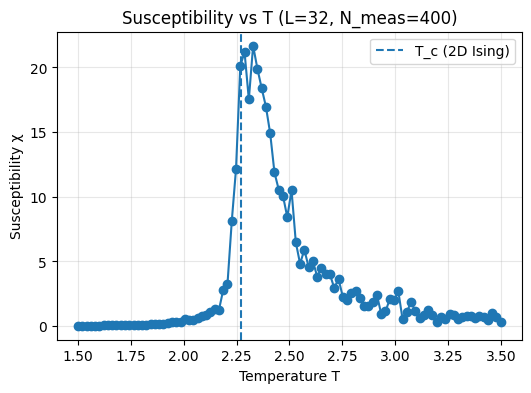

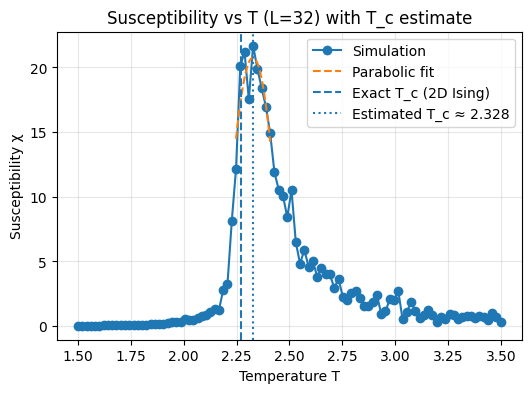

Estimated critical temperature T_c: 2.328


In [ ]:
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Initialize lattice
def initialize_lattice(L, seed=None):
    if seed is not None:
        rng = np.random.RandomState(seed)
        return rng.choice([-1, 1], size=(L, L)), rng
    else:
        rng = np.random.RandomState()
        return rng.choice([-1, 1], size=(L, L)), rng

# Wolff cluster step
def wolff_step_return_cluster(lattice, beta, rng):
    L = lattice.shape[0]
    visited = np.zeros((L, L), dtype=bool)
    i, j = rng.randint(0, L), rng.randint(0, L)
    cluster_spin = lattice[i, j]
    p_add = 1 - np.exp(-2 * beta)
    stack = [(i, j)]
    visited[i, j] = True

    while stack:
        x, y = stack.pop()
        neighbors = ((x+1)%L, y), ((x-1)%L, y), (x, (y+1)%L), (x, (y-1)%L)
        for nx, ny in neighbors:
            if (not visited[nx, ny]) and (lattice[nx, ny] == cluster_spin):
                if rng.rand() < p_add:
                    visited[nx, ny] = True
                    stack.append((nx, ny))

    lattice[visited] *= -1
    return lattice, np.sum(visited)

# Energy per spin
def energy_per_spin(lattice):
    E = - np.sum(lattice * np.roll(lattice, 1, axis=0)) \
        - np.sum(lattice * np.roll(lattice, 1, axis=1))
    return E / lattice.size

# Magnetization per spin
def magnetization_per_spin(lattice):
    return np.sum(lattice) / lattice.size

# Simulation parameters
L = 32
temps = np.linspace(1.5, 3.5, 100)
N_therm = 400
N_meas = 400
seed = 2025

results = []
lattice, rng = initialize_lattice(L, seed=seed)

# Monte Carlo simulation over temperatures
for idx, T in enumerate(temps):
    beta = 1.0 / T
    lattice, rng = initialize_lattice(L, seed=rng.randint(0, 2**31 - 1))

    # Thermalization
    for _ in range(N_therm):
        lattice, _ = wolff_step_return_cluster(lattice, beta, rng)

    # Measurements
    mags = np.empty(N_meas)
    energies = np.empty(N_meas)
    for k in range(N_meas):
        lattice, _ = wolff_step_return_cluster(lattice, beta, rng)
        mags[k] = abs(magnetization_per_spin(lattice))
        energies[k] = energy_per_spin(lattice)

    M_mean = np.mean(mags)
    E_mean = energies.mean()
    C = (beta**2) * lattice.size * (energies**2).mean() - (beta**2) * lattice.size * (E_mean**2)
    chi = beta * lattice.size * (np.mean(mags**2) - (M_mean**2))

    results.append({
        'T': T,
        'M': M_mean,
        'E': E_mean,
        'C': C,
        'chi': chi,
    })

# Convert to DataFrame
df = pd.DataFrame(results)

# Plot susceptibility vs T
plt.figure(figsize=(6,4))
plt.plot(df['T'], df['chi'], marker='o', linestyle='-')
plt.axvline(2.269, linestyle='--', label='T_c (2D Ising)')
plt.xlabel('Temperature T')
plt.ylabel('Susceptibility χ')
plt.title(f'Susceptibility vs T (L={L}, N_meas={N_meas})')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Define a simple parabolic function for fitting around the peak
def parabola(T, a, b, c):
    return a*(T-b)**2 + c

# Find the index of the maximum susceptibility
peak_idx = df['chi'].idxmax()
# Take a small window around the peak for fitting
window = 4  # points on each side
fit_indices = np.arange(max(0, peak_idx-window), min(len(df), peak_idx+window+1))
T_fit = df['T'].iloc[fit_indices].values
chi_fit = df['chi'].iloc[fit_indices].values

# Fit parabola
p0 = [-1000, 2.26, 25]  # initial guess for parameters
popt, _ = curve_fit(parabola, T_fit, chi_fit, p0=p0)
T_c_est = popt[1]

# Plot the susceptibility with fitted parabola
T_smooth = np.linspace(T_fit.min(), T_fit.max(), 200)
chi_smooth = parabola(T_smooth, *popt)

plt.figure(figsize=(6,4))
plt.plot(df['T'], df['chi'], marker='o', linestyle='-', label='Simulation')
plt.plot(T_smooth, chi_smooth, '--', label='Parabolic fit')
plt.axvline(2.269, linestyle='--', label='Exact T_c (2D Ising)')
plt.axvline(T_c_est, linestyle=':', label=f'Estimated T_c ≈ {T_c_est:.3f}')
plt.xlabel('Temperature T')
plt.ylabel('Susceptibility χ')
plt.title(f'Susceptibility vs T (L={L}) with T_c estimate')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

print(f"Estimated critical temperature T_c: {T_c_est:.3f}")

Grid: x in [-300.0,300.0], dx=0.3, Nx=2001
Time: dt=0.02, t_final=150.0, n_steps=7500

Final T = 0.463417, R = 0.366645, central = 0.169938, total = 1.000000
Elapsed time: 34.8 s


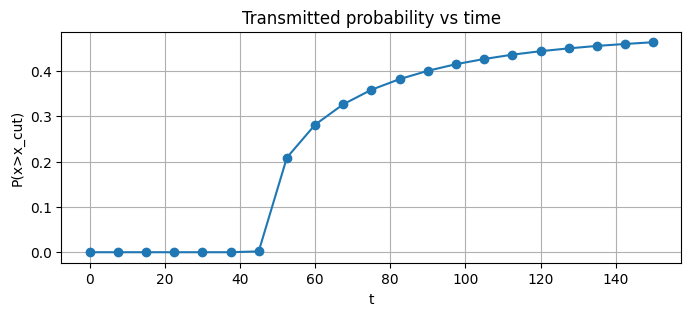

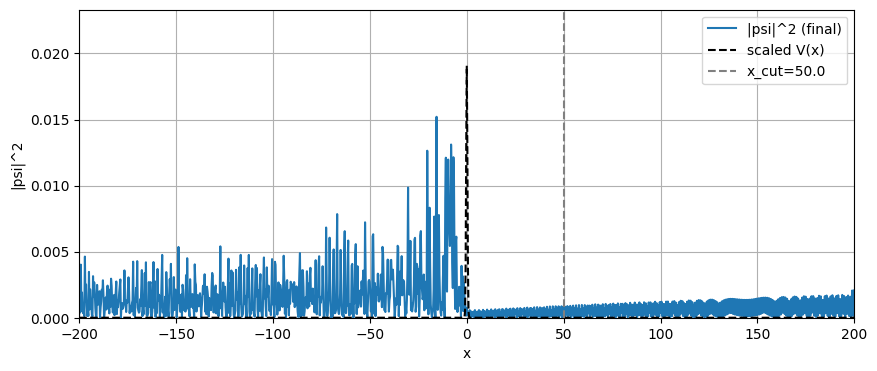

In [ ]:
# Running Crank-Nicolson TDSE to compute transmission coefficient for the given problem.
# Parameters from user: sigma=3.0, x0=-100, k0=1.5, V0=1.0, a=1.5
# Fixed boundaries psi=0 at edges (Dirichlet).
import numpy as np
import matplotlib.pyplot as plt
import pickle, time, math

start_time = time.time()

# --- Parameters ---
sigma = 3.0
x0 = -100.0
k0 = 1.5
V0 = 1.0
a = 1.5

# Spatial grid
x_min, x_max = -300.0, 300.0
dx = 0.3
x = np.arange(x_min, x_max + dx, dx)
Nx = x.size

# Time stepping
dt = 0.02
t_final = 150.0
n_steps = int(np.ceil(t_final / dt))

# Transmission cut
x_cut = 50.0

print(f"Grid: x in [{x_min},{x_max}], dx={dx}, Nx={Nx}")
print(f"Time: dt={dt}, t_final={t_final}, n_steps={n_steps}")

# Potential (Gaussian barrier)
V = V0 * np.exp(-2.0 * (a**2) * x**2)

# Initial wavefunction (as given) and renormalize numerically
prefactor = (2.0 * np.pi * sigma**2) ** 0.25
psi = prefactor * np.exp(-4.0 * sigma**2 * (x - x0)**2 + 1j * k0 * x)
psi /= np.sqrt(np.sum(np.abs(psi)**2) * dx)

# Crank-Nicolson setup for interior points (Dirichlet BCs: psi[0]=psi[-1]=0)
N = Nx - 2  # interior unknowns indices 1..Nx-2
coeff_off = -1.0 / (2.0 * dx**2)  # from -1/2 d2/dx2
H_diag = np.ones(N, dtype=complex) * (-2.0 * coeff_off) + V[1:-1]

a_off_A = 1j * dt / 2.0 * coeff_off
a_off_B = -1j * dt / 2.0 * coeff_off
diag_A = 1.0 + 1j * dt / 2.0 * H_diag
diag_B = 1.0 - 1j * dt / 2.0 * H_diag
lower_A = np.ones(N-1, dtype=complex) * a_off_A
upper_A = np.ones(N-1, dtype=complex) * a_off_A

# Thomas solver (in-place style)
def thomas_complex(lower, diag, upper, rhs):
    n = diag.size
    a = lower.copy()
    b = diag.copy()
    c = upper.copy()
    d = rhs.copy()
    for i in range(1, n):
        m = a[i-1] / b[i-1]
        b[i] = b[i] - m * c[i-1]
        d[i] = d[i] - m * d[i-1]
    xsol = np.empty(n, dtype=complex)
    xsol[-1] = d[-1] / b[-1]
    for i in range(n-2, -1, -1):
        xsol[i] = (d[i] - c[i] * xsol[i+1]) / b[i]
    return xsol

# Time evolution
psi[0] = 0.0 + 0.0j
psi[-1] = 0.0 + 0.0j
transmitted_vs_time = []
times = []
save_every = max(1, n_steps // 20)
snapshots = []

for n in range(n_steps):
    # record transmitted probability and time occasionally
    if n % save_every == 0 or n == n_steps-1:
        times.append(n*dt)
        transmitted_vs_time.append(np.sum(np.abs(psi[x > x_cut])**2) * dx)
    # Build RHS B * psi_interior
    psi_in = psi[1:-1]
    rhs = np.empty_like(psi_in, dtype=complex)
    if N == 1:
        rhs[0] = diag_B[0] * psi_in[0] + a_off_B * (psi[0] + psi[-1])
    else:
        rhs[0] = diag_B[0] * psi_in[0] + a_off_B * psi[0] + a_off_B * psi_in[1]
        rhs[-1] = diag_B[-1] * psi_in[-1] + a_off_B * psi_in[-2] + a_off_B * psi[-1]
        if N > 2:
            rhs[1:-1] = diag_B[1:-1] * psi_in[1:-1] + a_off_B * (psi_in[:-2] + psi_in[2:])
    psi_next_in = thomas_complex(lower_A, diag_A.copy(), upper_A, rhs)
    psi[1:-1] = psi_next_in
    psi[0] = 0.0 + 0.0j
    psi[-1] = 0.0 + 0.0j

# Final transmitted fraction
T_final = np.sum(np.abs(psi[x > x_cut])**2) * dx
R_final = np.sum(np.abs(psi[x < -x_cut])**2) * dx
central = np.sum(np.abs(psi[(x >= -x_cut) & (x <= x_cut)])**2) * dx
total_prob = np.sum(np.abs(psi)**2) * dx
elapsed = time.time() - start_time

print(f"\nFinal T = {T_final:.6f}, R = {R_final:.6f}, central = {central:.6f}, total = {total_prob:.6f}")
print(f"Elapsed time: {elapsed:.1f} s")

# Plot transmitted vs time and final |psi|^2
plt.figure(figsize=(8,3))
plt.plot(times, transmitted_vs_time, marker='o')
plt.xlabel('t'); plt.ylabel('P(x>x_cut)'); plt.title('Transmitted probability vs time')
plt.grid(True)
plt.show()

plt.figure(figsize=(10,4))
plt.plot(x, np.abs(psi)**2, label='|psi|^2 (final)')
plt.plot(x, V/np.max(V) * np.max(np.abs(psi)**2) * 0.9, 'k--', label='scaled V(x)')
plt.axvline(x_cut, color='gray', linestyle='--', label=f'x_cut={x_cut}')
plt.xlim(-200, 200)
plt.ylim(0, np.max(np.abs(psi)**2)*1.1)
plt.xlabel('x'); plt.ylabel('|psi|^2'); plt.legend(); plt.grid(True)
plt.show()


Calculate the average length of the Huffman code and Shannon-Fano code generated for the N + 5 symbols with the following probability values and get the difference between them
0.2, 0.05, 0.125, 0.125, $\sum_{1}^{N}1/3^N$ and p for N=100.

In [ ]:
import heapq

def huffman_length(probabilities):
    heap = probabilities[:]
    heapq.heapify(heap)
    avg_length = 0.0
    while len(heap) > 1:
        p1 = heapq.heappop(heap)
        p2 = heapq.heappop(heap)
        avg_length += p1 + p2
        heapq.heappush(heap, p1 + p2)
    return avg_length

def generate_probabilities(n=100):
    # fixed probabilities
    probs = [0.2, 0.05, 0.125, 0.125]
    geom = [1/(3**k) for k in range(1, n+1)]
    probs.extend(geom)
    total = sum(probs)
    p = 1 - total
    probs.append(p)
    return probs

def shannon_fano_length(probs):
    sorted_indices = sorted(range(len(probs)), key=lambda i: -probs[i])
    def recursive_length(indices, depth=0):
        if len(indices) == 1:
            return probs[indices[0]] * depth
        total = sum(probs[i] for i in indices)
        acc = 0
        split = 0
        for j, i in enumerate(indices):
            acc += probs[i]
            if acc >= total / 2:
                split = j + 1
                break

        left = indices[:split]
        right = indices[split:]

        return recursive_length(left, depth + 1) + recursive_length(right, depth + 1)

    return recursive_length(sorted_indices)

probs = generate_probabilities(100)
print(huffman_length(probs) - shannon_fano_length(probs))


-0.03148148148148122


Detected peaks (nm):
  λ₀ = 1941.50 nm, height ≈ 7640.3 (above baseline)
  λ₀ = 1947.78 nm, height ≈ 11479.8 (above baseline)
  λ₀ = 2041.82 nm, height ≈ 181.7 (above baseline)
  λ₀ = 2095.03 nm, height ≈ 57030.7 (above baseline)
λ_peak = 2095.0 nm
τ_r = 7.740e-03 s
I(λ_peak)/∫I dλ = 4.809e+07 1/m
σ_ems(λ_peak) = 4.792e-24 m^2 = 4.792e-20 cm^2


/tmp/ipython-input-2248477000.py:636: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  int_I_dlambda = np.trapz(I, wl_m)   # trapezoidal integration, units [a.u.·m]


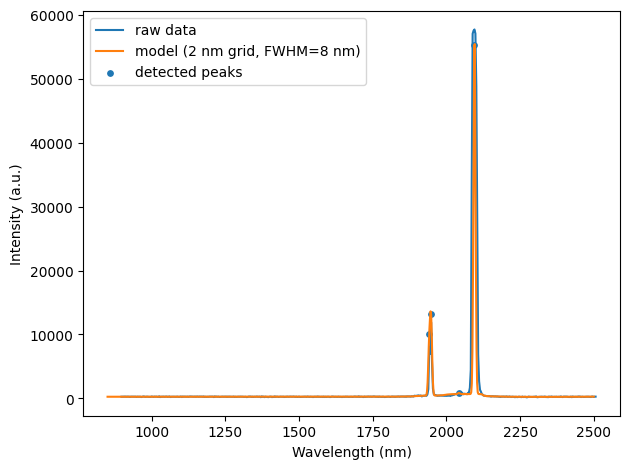

In [3]:
import numpy as np

# --------------------------
# 0) Paste your raw data here (two columns: wavelength[nm] \t intensity)
# --------------------------
raw_txt = """
897.03	257.45
900.24	255.18
903.45	251.14
906.66	267.97
909.87	280.62
913.08	248.68
916.29	276.39
919.5	260.59
922.71	271.76
925.92	219.58
929.12	267.99
932.33	263.8
935.54	250.14
938.75	245.91
941.96	262.48
945.16	268.01
948.37	224.86
951.58	270.11
954.79	252.22
957.99	259.08
961.2	261.69
964.41	210.73
967.61	243.72
970.82	294.75
974.02	287.82
977.23	242.76
980.43	244.88
983.64	273.22
986.84	249.92
990.05	238.59
993.25	233.97
996.46	234.38
999.66	294.29
1002.86	264.64
1006.07	230.9
1009.27	277.45
1012.47	255.29
1015.68	276.42
1018.88	244.89
1022.08	234.28
1025.28	318.23
1028.48	207.59
1031.69	265.86
1034.89	246.85
1038.09	275.95
1041.29	260.57
1044.49	249.1
1047.69	278.52
1050.89	280.62
1054.09	236.18
1057.29	268.01
1060.49	298.46
1063.69	206.98
1066.89	253.25
1070.09	262.76
1073.29	259.38
1076.49	257.48
1079.69	259.45
1082.88	244.75
1086.08	276.43
1089.28	254.6
1092.48	227
1095.67	265.84
1098.87	293.95
1102.07	214.17
1105.26	290.02
1108.46	254.04
1111.66	273.22
1114.85	268
1118.05	255.3
1121.24	275.33
1124.44	236.28
1127.64	281.67
1130.83	292.06
1134.02	280.63
1137.22	282.47
1140.41	240.38
1143.61	260.32
1146.8	285.77
1149.99	243.99
1153.19	290.03
1156.38	280.6
1159.57	247.93
1162.77	289.91
1165.96	270.84
1169.15	280.98
1172.34	248.31
1175.54	305.79
1178.73	221.34
1181.92	264.38
1185.11	228.1
1188.3	259.59
1191.49	236.07
1194.68	270.85
1197.87	272.19
1201.06	267.99
1204.25	261.55
1207.44	277.16
1210.63	206.04
1213.82	308.69
1217.01	252.21
1220.2	282.16
1223.39	244.83
1226.57	278.44
1229.76	222.71
1232.95	237.53
1236.14	245.86
1239.33	274.26
1242.51	253.96
1245.7	269.06
1248.89	253.3
1252.07	281.55
1255.26	222.42
1258.45	278.52
1261.63	244.89
1264.82	277.05
1268	250.73
1271.19	255.35
1274.37	248.76
1277.56	286.62
1280.74	219.23
1283.93	258.56
1287.11	231.03
1290.29	248.99
1293.48	264.86
1296.66	249.58
1299.84	271.16
1303.03	256.16
1306.21	257.78
1309.39	261.71
1312.58	232.04
1315.76	242.66
1318.94	254.31
1322.12	202.37
1325.3	225.79
1328.48	273.23
1331.67	287.87
1334.85	285.43
1338.03	225.89
1341.21	274.29
1344.39	221.29
1347.57	260.48
1350.75	250.12
1353.93	259.61
1357.11	289.61
1360.29	244.35
1363.46	254.27
1366.64	274.2
1369.82	192.53
1373	312.92
1376.18	229.28
1379.35	280.63
1382.53	201.6
1385.71	277.47
1388.89	234.16
1392.06	239.07
1395.24	190.04
1398.42	252.17
1401.59	264.86
1404.77	279.33
1407.94	192.11
1411.12	253.16
1414.3	217.47
1417.47	307.93
1420.65	230
1423.82	267.96
1427	263.73
1430.17	219.45
1433.34	250.07
1436.52	269.97
1439.69	255.35
1442.86	245.92
1446.04	274.31
1449.21	212.99
1452.38	254.11
1455.56	230.17
1458.73	279.44
1461.9	258.42
1465.07	242.5
1468.24	272.2
1471.41	277.47
1474.59	261.12
1477.76	262.55
1480.93	286.76
1484.1	261.59
1487.27	232.14
1490.44	276.35
1493.61	222.82
1496.78	239.47
1499.95	276.42
1503.12	223.84
1506.29	234.38
1509.45	258.44
1512.62	259.6
1515.79	258.55
1518.96	263.79
1522.13	261.7
1525.29	232.28
1528.46	289.03
1531.63	263.38
1534.8	228.91
1537.96	268.01
1541.13	238.49
1544.3	254.35
1547.46	200.66
1550.63	267.98
1553.79	239.48
1556.96	263.81
1560.12	235.41
1563.29	299.36
1566.45	239.62
1569.62	257.47
1572.78	230.14
1575.95	257.48
1579.11	216.5
1582.28	283.72
1585.44	210.84
1588.6	264.86
1591.77	218.56
1594.93	253.02
1598.09	255.34
1601.25	255.38
1604.42	211.25
1607.58	221.42
1610.74	279.72
1613.9	281.43
1617.06	252.86
1620.22	239.55
1623.38	255.39
1626.54	246.64
1629.71	233.11
1632.87	271.53
1636.03	242.78
1639.19	248.96
1642.34	241.74
1645.5	209.16
1648.66	250.14
1651.82	236.37
1654.98	235.43
1658.14	270.09
1661.3	251.2
1664.46	262.16
1667.61	232.22
1670.77	238
1673.93	254.3
1677.09	256.66
1680.24	227
1683.4	238.57
1686.56	266.94
1689.71	289.87
1692.87	249.92
1696.02	260.61
1699.18	251.05
1702.33	318.6
1705.49	226.41
1708.64	263.81
1711.8	263.69
1714.95	242.79
1718.11	204.17
1721.26	287.78
1724.42	232.72
1727.57	257.34
1730.72	253.71
1733.88	286.47
1737.03	267.86
1740.18	260.51
1743.33	279.55
1746.49	250.86
1749.64	277.08
1752.79	297.19
1755.94	289.01
1759.09	258.78
1762.25	253.29
1765.4	269.78
1768.55	221.45
1771.7	285.72
1774.85	242.69
1778	248.31
1781.15	223.86
1784.3	273.67
1787.45	229.12
1790.6	213.32
1793.75	227.73
1796.89	253.28
1800.04	261.54
1803.19	273.16
1806.34	255.31
1809.49	219.12
1812.63	253.13
1815.78	293.17
1818.93	252.13
1822.08	279.54
1825.22	233.27
1828.37	272.48
1831.52	261.92
1834.66	286.8
1837.81	291.94
1840.95	254.35
1844.1	289.02
1847.24	288.95
1850.39	277.44
1853.53	287.67
1856.68	262.7
1859.82	290.07
1862.97	244.8
1866.11	317.39
1869.26	292.95
1872.4	308.97
1875.54	295.25
1878.69	274.31
1881.83	338.29
1884.97	315.22
1888.11	285.38
1891.26	417.23
1894.4	366.44
1897.54	425.64
1900.68	363.4
1903.82	478.04
1906.96	381.76
1910.1	433.95
1913.25	446.69
1916.39	307.94
1919.53	389.9
1922.67	396.07
1925.81	415.04
1928.95	436.18
1932.08	407.48
1935.22	615.89
1938.36	1444.62
1941.5	8065.98
1944.64	6982.21
1947.78	11909.46
1950.92	5668.19
1954.05	1518.29
1957.19	609.66
1960.33	555.99
1963.47	497.03
1966.6	444.5
1969.74	403.6
1972.88	429.68
1976.01	420.08
1979.15	439.21
1982.28	428.8
1985.42	436.1
1988.56	408.83
1991.69	430.28
1994.83	391.74
1997.96	444.59
2001.1	384.92
2004.23	457.21
2007.36	414.7
2010.5	454.4
2013.63	381.47
2016.76	531.22
2019.9	476.11
2023.03	595.8
2026.16	561.04
2029.3	657.71
2032.43	684.22
2035.56	680.79
2038.69	664.2
2041.82	858.46
2044.96	787.22
2048.09	770.47
2051.22	769.35
2054.35	801.73
2057.48	649.54
2060.61	734.85
2063.74	702.56
2066.87	701.01
2070	647.18
2073.13	867.81
2076.26	918.54
2079.39	1653.93
2082.52	4468.5
2085.64	33500.08
2088.77	57041.2
2091.9	57522.54
2095.03	57707.49
2098.16	57062.22
2101.28	48790.99
2104.41	28202.53
2107.54	6858.72
2110.67	2679.27
2113.79	1337.86
2116.92	1039.54
2120.05	676.78
2123.17	568.58
2126.3	433.86
2129.42	422.46
2132.55	394.14
2135.67	364.7
2138.8	354.98
2141.92	352.01
2145.05	324.77
2148.17	338.44
2151.29	275.37
2154.42	338.3
2157.54	321.59
2160.67	316.36
2163.79	301.46
2166.91	316.3
2170.03	289.73
2173.16	299.54
2176.28	264.85
2179.4	260.57
2182.52	223.74
2185.64	260.61
2188.77	267.68
2191.89	271.72
2195.01	279.56
2198.13	246.6
2201.25	274.31
2204.37	303.61
2207.49	238.49
2210.61	252.07
2213.73	293.88
2216.85	259.53
2219.97	214.4
2223.09	273.27
2226.21	236.37
2229.32	253.22
2232.44	182.88
2235.56	264.58
2238.68	205.99
2241.8	203.87
2244.91	256.45
2248.03	255.22
2251.15	216.71
2254.26	193.91
2257.38	282.57
2260.5	218.19
2263.61	216.47
2266.73	264.21
2269.84	194.86
2272.96	166.06
2276.08	211.69
2279.19	282.17
2282.3	234.28
2285.42	227.47
2288.53	230.04
2291.65	223.68
2294.76	246.97
2297.88	256.45
2300.99	239.63
2304.1	303.69
2307.22	183.93
2310.33	190.16
2313.44	232.1
2316.55	241.71
2319.67	255.36
2322.78	264.04
2325.89	242.68
2329	232.12
2332.11	276.39
2335.22	267.73
2338.33	201.78
2341.44	242.78
2344.55	183.23
2347.66	284.32
2350.77	229.95
2353.88	259.6
2356.99	293.11
2360.1	222.8
2363.21	237.39
2366.32	251.92
2369.43	235.47
2372.54	263.75
2375.65	235.24
2378.75	231.52
2381.86	254.82
2384.97	219.67
2388.08	304.27
2391.18	242.2
2394.29	204.92
2397.4	273.23
2400.5	270.08
2403.61	269.94
2406.72	258.29
2409.82	269.07
2412.93	215.53
2416.03	238.56
2419.14	206.94
2422.24	285.88
2425.35	190.63
2428.45	295.27
2431.56	229.13
2434.66	242.44
2437.76	252.24
2440.87	251.17
2443.97	242.58
2447.07	289.04
2450.18	275.37
2453.28	289.04
2456.38	205.88
2459.49	259.55
2462.59	254.92
2465.69	223.28
2468.79	239.58
2471.89	254.03
2474.99	255.4
2478.09	261.7
2481.19	259.52
2484.3	238.1
2487.4	241.13
2490.5	213.32
2493.6	296.37
2496.7	272.75
2499.79	219.67
2502.89	266.79
2505.99	272.97
"""

# --------------------------
# 1) Parse the two-column data
# --------------------------
pairs = []
for line in raw_txt.strip().splitlines():
    parts = line.strip().split()
    if len(parts) == 2:
        wl, it = map(float, parts)
        pairs.append((wl, it))

data = np.array(pairs)
wl_nm_raw = data[:, 0]
I_raw = data[:, 1]

# --------------------------
# 2) Build a regular wavelength grid: 850..2500 nm, step 2 nm
# --------------------------
wl_nm = np.arange(850.0, 2500.0 + 1e-9, 2.0)  # nm
wl_m  = wl_nm * 1e-9                          # meters (if needed)

# --------------------------
# 3) Baseline estimation (robust moving median)
# --------------------------
def moving_median(x, w):
    """Odd window moving median."""
    w = int(w) | 1
    pad = w // 2
    xp = np.pad(x, pad_width=pad, mode='edge')
    med = np.empty_like(x, dtype=float)
    for i in range(len(x)):
        med[i] = np.median(xp[i:i+w])
    return med

baseline_raw = moving_median(I_raw, w=51)        # smooth background
residual = I_raw - baseline_raw

# Robust scale (MAD)
mad = np.median(np.abs(residual - np.median(residual))) + 1e-9
robust_std = 1.4826 * mad

# --------------------------
# 4) Peak detection (local maxima above baseline by threshold)
# --------------------------
def find_peaks(x, y, y_baseline, k_sigma=6.0, min_separation_nm=6.0):
    y_res = y - y_baseline
    thr = np.median(y_res) + k_sigma * robust_std
    # Local maxima
    is_max = (y[1:-1] > y[:-2]) & (y[1:-1] >= y[2:])
    idx = np.where(is_max & (y_res[1:-1] > thr))[0] + 1
    # Enforce minimum separation
    keep = []
    for i in idx:
        if not keep:
            keep.append(i)
        else:
            if (x[i] - x[keep[-1]]) >= min_separation_nm:
                keep.append(i)
            else:
                # keep the taller of the two close peaks
                if y[i] > y[keep[-1]]:
                    keep[-1] = i
    return np.array(keep, dtype=int)

peak_idx = find_peaks(wl_nm_raw, I_raw, baseline_raw, k_sigma=6.0, min_separation_nm=6.0)
peak_centers_nm = wl_nm_raw[peak_idx]
peak_heights = (I_raw - baseline_raw)[peak_idx]   # peak height above baseline

# --------------------------
# 5) Rebuild intensity on the regular grid as sum of Gaussians (FWHM = 8 nm)
# --------------------------
FWHM = 8.0
def gaussian_nm(x_nm, center_nm, height, fwhm_nm=8.0):
    return height * np.exp(-4*np.log(2) * ((x_nm - center_nm)**2) / (fwhm_nm**2))

# Baseline on the new grid: gently varying baseline from raw baseline (interpolated)
baseline_grid = np.interp(wl_nm, wl_nm_raw, baseline_raw)

I_model = np.zeros_like(wl_nm, dtype=float)
for c, h in zip(peak_centers_nm, peak_heights):
    I_model += gaussian_nm(wl_nm, c, h, fwhm_nm=FWHM)

I_model += baseline_grid

# --------------------------
# 6) Outputs you can use elsewhere
# --------------------------
# wavelength arrays:
wavelength_nm = wl_nm            # e.g., array([850., 852., ..., 2500.])
wavelength_m  = wl_m             # same, in meters

# intensity array on that grid:
intensity = I_model              # reconstructed intensity on 2-nm grid

# Optional: show detected peak summary
print("Detected peaks (nm):")
for c, h in zip(peak_centers_nm, peak_heights):
    print(f"  λ₀ = {c:.2f} nm, height ≈ {h:.1f} (above baseline)")

import numpy as np

# ---- Constants ----
n = 1.82
c = 2.999999e8          # m/s
tau_r_s = 7.74e-3       # 10.1 ms → seconds

# ---- Arrays from previous processing ----
# wavelength_nm = ...
# intensity = ...
wl_nm = np.asarray(wavelength_nm, dtype=float)
I = np.asarray(intensity, dtype=float)
wl_m = wl_nm * 1e-9     # convert nm → m

# Clip any negatives due to preprocessing noise
I = np.clip(I, a_min=0.0, a_max=None)

# ---- Normalization denominator: ∫ I(λ) dλ ----
int_I_dlambda = np.trapz(I, wl_m)   # trapezoidal integration, units [a.u.·m]

# ---- Evaluate at 2095 nm ----
lambda_peak_nm = 2095.0
lambda_peak_m = lambda_peak_nm * 1e-9
I_at_peak = np.interp(lambda_peak_m, wl_m, I)

# Prefactor λ^4 / (8 π c n^2 τ_r)
prefactor = (lambda_peak_m**4) / (8.0 * np.pi * c * (n**2) * tau_r_s)

# Cross section
sigma_peak_m2 = prefactor * (I_at_peak / int_I_dlambda)
sigma_peak_cm2 = sigma_peak_m2 * 1e4

print(f"λ_peak = {lambda_peak_nm:.1f} nm")
print(f"τ_r = {tau_r_s:.3e} s")
print(f"I(λ_peak)/∫I dλ = {I_at_peak/int_I_dlambda:.3e} 1/m")
print(f"σ_ems(λ_peak) = {sigma_peak_m2:.3e} m^2 = {sigma_peak_cm2:.3e} cm^2")

# --------------------------
# 7) (Optional) Quick check plot
# --------------------------
if __name__ == "__main__":
    try:
        import matplotlib.pyplot as plt
        plt.figure()
        plt.plot(wl_nm_raw, I_raw, label="raw data")
        plt.plot(wl_nm, intensity, label="model (2 nm grid, FWHM=8 nm)")
        plt.scatter(peak_centers_nm, np.interp(peak_centers_nm, wl_nm, intensity),
                    s=15, label="detected peaks")
        plt.xlabel("Wavelength (nm)")
        plt.ylabel("Intensity (a.u.)")
        plt.legend()
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print("Plotting skipped:", e)
